In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, dstn, idstn, fftshift, ifftshift

from classicalfield_orig import FiniteTempGPE as gpe 

### Test to see how the classical field runs without vortex 

No vortices to be spawned
Total Imag Time:  1.3036456108093262
kmax:  4.0212385965949355
T:  4.042589962686201
(13, 128, 128)
(1, 128, 128)


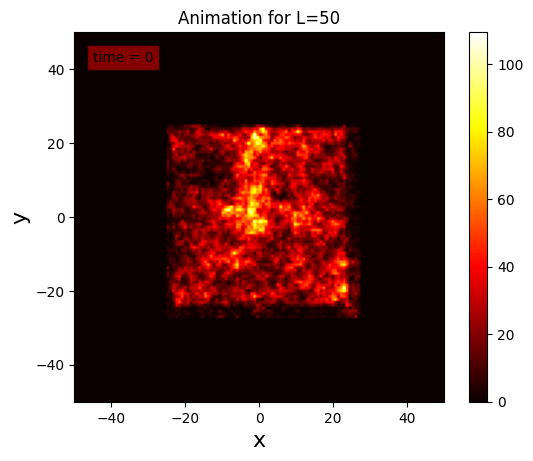

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 3000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'testboxnovortex.mp4', Tfact = 1/2, dst = False)

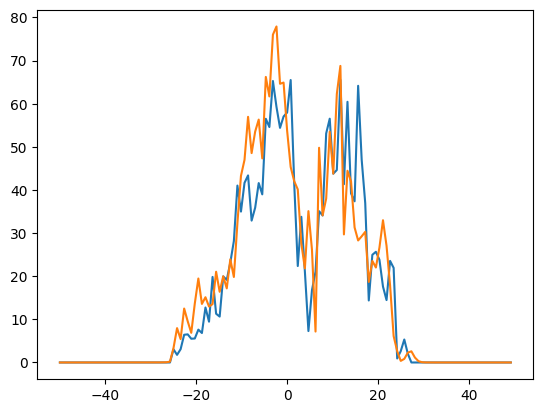

In [3]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

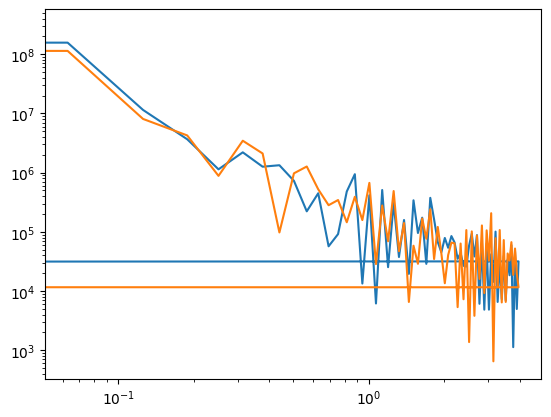

In [4]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.xscale('log')
plt.yscale('log')

### Test simulation for a vortex-vortex pair 

TODO: Maybe increase the temperature here relative to the interaction energy by decreasing the box size if this works in the other simulation

In [ ]:
g_2 = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 2500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'testboxvortex6.mp4', Tfact = 1/10, dst = False, vortex = True)

Total Imag Time:  1.2694332599639893
kmax:  4.0212385965949355
T:  0.8085179925372403


In [6]:
print(np.shape(g.vortex_positions))

(1201, 4)


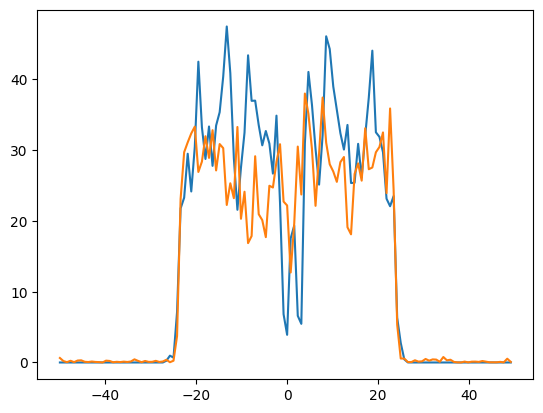

In [3]:
plt.figure() 
plt.plot(g.xi[0][0], np.abs(g.snaps[0][len(g.snaps[0])//2])**2)
plt.plot(g.xi[0][0], np.abs(g.snaps[-1][len(g.snaps[-1])//2])**2)

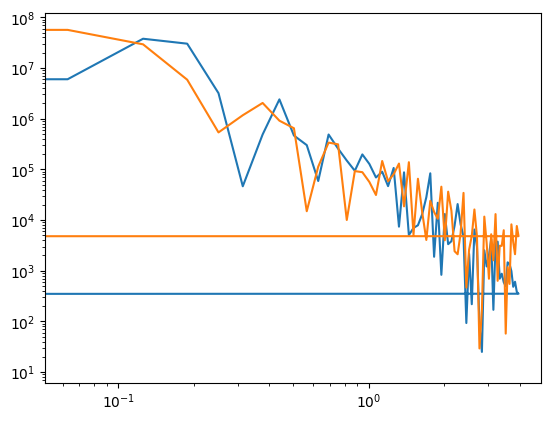

In [4]:
plt.figure() 
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[0])[0])**2)
plt.plot(g.ki[0][0], np.abs(fft2(g.snaps[-1])[0])**2)
plt.xscale('log')
plt.yscale('log')

Text(0, 0.5, 'Vortex Distance')

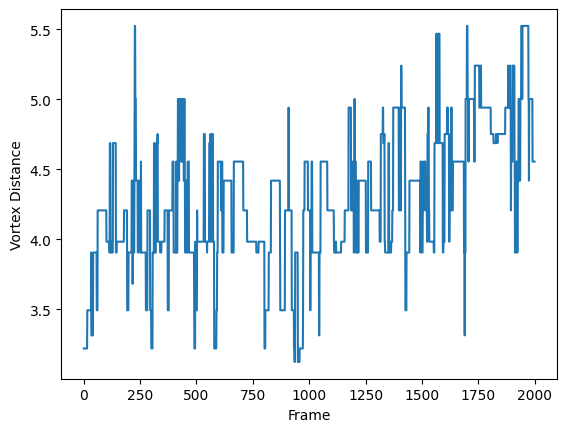

In [9]:
dist = np.sqrt(np.abs(g.vortex_positions[:,0]-g.vortex_positions[:,2])**2 + np.abs(g.vortex_positions[:,1]-g.vortex_positions[:,3])**2) 
plt.figure() 
plt.plot(np.arange(0, len(g.snaps)), dist)
plt.xlabel('Frame')
plt.ylabel('Vortex Distance')

C:\Users\TQC User\AppData\Local\Temp\ipykernel_15812\3295402967.py:1: RuntimeWarning: divide by zero encountered in divide
  ang = np.arctan((g.vortex_positions[:,1]-g.vortex_positions[:,3])/(g.vortex_positions[:,0] - g.vortex_positions[:,2]))


Text(0, 0.5, 'Vortex Angle (rad)')

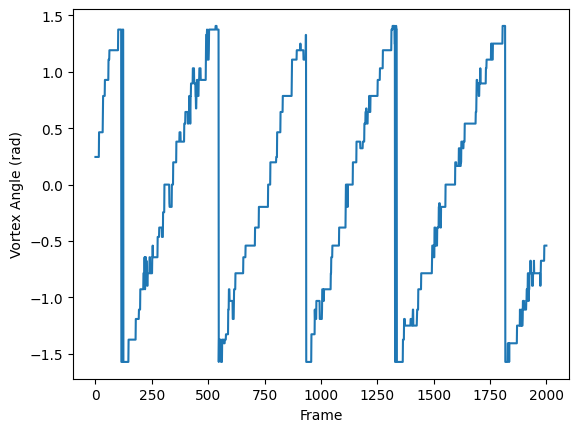

In [8]:
ang = np.arctan((g.vortex_positions[:,1]-g.vortex_positions[:,3])/(g.vortex_positions[:,0] - g.vortex_positions[:,2]))
plt.figure() 
plt.plot(np.arange(0, len(g.snaps)), ang)
plt.xlabel('Frame')
plt.ylabel('Vortex Angle (rad)')

TODO: Fix the direction that the arrows go... why do they go the wrong way? Also see why there is an out of bounds error for longer runs.. maybe the issue with vorticies close together? Test frame by frame if things are working and how to fix.... 

In [14]:
print(np.shape(g.snaps))

(81, 128, 128)


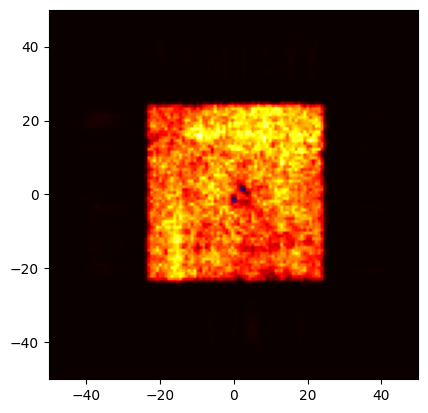

In [28]:
snap = 80
plt.figure() 
plt.imshow(np.abs(g.snaps[snap])**2, origin = 'lower', extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = plt.cm.hot)
plt.scatter(g.xi[0][0][int((g.vortex_positions[snap][0]+1)/g.dx+g.winL/4/g.dx)], g.xi[0][0][int((g.vortex_positions[snap][1]+1)/g.dx+g.winL/4/g.dx)], s = 10, color = 'blue', alpha = 0.3)
plt.scatter(g.xi[0][0][int((g.vortex_positions[snap][2]+1)/g.dx+g.winL/4/g.dx)], g.xi[0][0][int((g.vortex_positions[snap][3]+1)/g.dx+g.winL/4/g.dx)], s = 10, color = 'blue', alpha = 0.3)

In [3]:
print(np.shape(g.snaps[0]))

(128, 128)


32.5


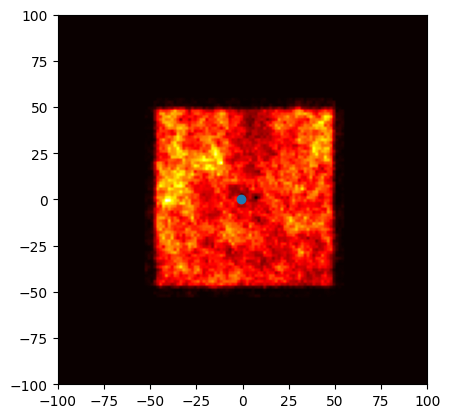

In [6]:
psi = g.snaps[0][int(g.L/2/g.dx):int(3*g.L/2/g.dx), int(g.L/2/g.dx):int(3*g.L/2/g.dx)]
psi = g.snaps[0]
print(g.vortex_positions[0][1]/g.dx)
plt.figure() 
plt.imshow(np.abs(psi)**2, origin = 'lower', cmap = plt.cm.hot, extent = [-g.winL, g.winL, -g.winL, g.winL])
plt.scatter(g.xi[0][0][int(g.vortex_positions[0][0]/g.dx + g.winL/4/g.dx)], g.xi[0][0][int(g.vortex_positions[0][1]/g.dx + g.winL/4/g.dx)])

In [3]:
print(g.vortex_positions)

[[27.734375 24.609375 24.609375 25.390625]
 [27.734375 24.609375 24.609375 25.390625]
 [24.609375 25.390625 27.734375 25.390625]
 [24.609375 25.390625 27.734375 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]
 [24.609375 25.390625 28.515625 25.390625]]


### Test Simulation for Vortex-AntiVortex pair 

Total Imag Time:  1.3006253242492676
kmax:  4.0212385965949355
T:  0.8085179925372403
(121, 128, 128)
(1, 128, 128)


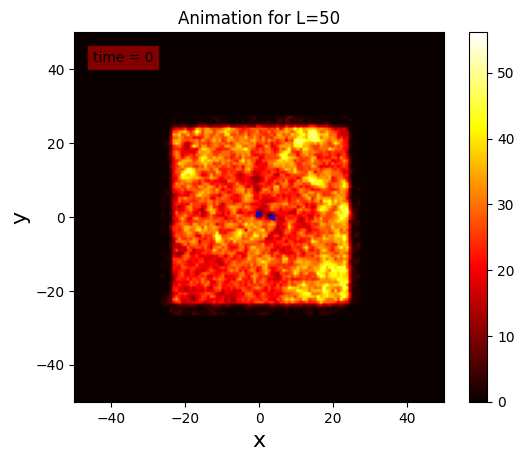

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 30000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = True, animFileName = 'testboxantivortex.mp4', Tfact = 1/10, dst = False, vortex = True, antiV = True)

In [8]:
print(g.vortex_positions)

[[25.390625 24.609375 27.734375 24.609375]
 [25.390625 24.609375 27.734375 24.609375]
 [25.390625 24.609375 27.734375 24.609375]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]
 [27.734375 24.609375 25.390625 25.390625]]
